In [1]:

import getdist
from getdist import plots, MCSamples
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%matplotlib inline


g = plots.getSubplotPlotter(width_inch=8)

In [2]:
fiducial = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-fidA-nautilus.txt'
imprint = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-psf4_A.txt'
fiducial_chains = np.genfromtxt(fiducial, names=True)
imprint_chains = np.genfromtxt(imprint, names=True)

In [3]:
fiducial_chains

array([(0.60170188, 0.86254814, 0.06521231, 0.94917927, 0.72314191, 0.22161232, -0.0018876 , -0.01873888, -0.03146635, -0.02954736, -0.00058324, 0.02359287, -0.01046937,  0.00447411, -0.96631594,  1.41723148, -3.27657815, -3.26258764, 0.14456108,        nan,        nan,            nan,            -inf, 24.72468706,            -inf),
       (0.64639014, 0.83922181, 0.04877928, 0.91328943, 0.74532243, 0.23731562, -0.01179452, -0.01248381, -0.02997519, -0.03449745,  0.02054694, 0.0109354 ,  0.00836565,  0.00986582, -0.32392073, -3.37750996,  0.82506744, -3.89240863, 1.13724455, 0.5077588 , 0.40848552, 2.03767228e+05, -1.01795331e+05, 25.16844132, -98533.11168594),
       (0.22959646, 0.55357602, 0.05647049, 0.88704162, 0.80287547, 0.18003005, -0.02131501, -0.02581024, -0.03214033, -0.05357382, -0.00502331, 0.01733178,  0.00898908,  0.01458806,  4.05947112,  4.21051885, -2.25322249, -2.90957382, 1.13754933, 0.91775387, 1.01176906, 7.12446511e+04, -3.55340430e+04, 21.4812803 , -32275.51049 

Removed no burn in


Removed no burn in


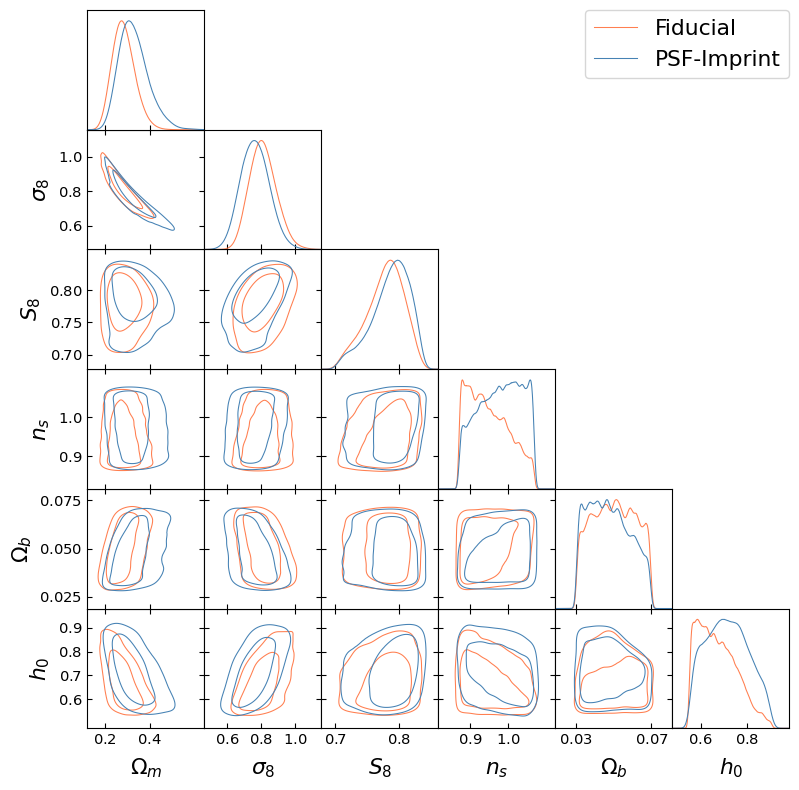

In [5]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h_0'])

uu = imprint_chains
imprint_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h_0'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial', 'PSF-Imprint'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

Removed no burn in
Removed no burn in


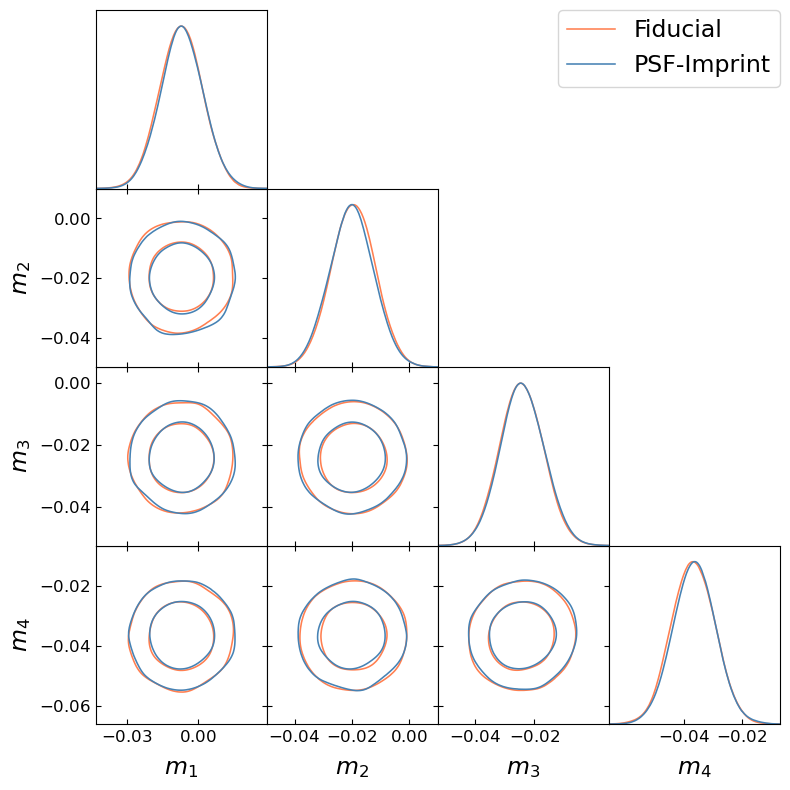

In [6]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['shear_calibration_parametersm1'],uu['shear_calibration_parametersm2'],
                               (uu['shear_calibration_parametersm3']), uu['shear_calibration_parametersm4']],
                                weights=np.exp(uu['log_weight']), names = ['m1','m2','m3','m4'], labels = ['m_1','m_2','m_3','m_4'])

uu = imprint_chains
imprint_samples = MCSamples(samples=np.c_[uu['shear_calibration_parametersm1'],uu['shear_calibration_parametersm2'],
                               (uu['shear_calibration_parametersm3']), uu['shear_calibration_parametersm4']],
                                weights=np.exp(uu['log_weight']), names = ['m1','m2','m3','m4'], labels = ['m_1','m_2','m_3','m_4'])

g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['m1','m2','m3','m4'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial', 'PSF-Imprint'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

In [6]:
g.add_text('LCDM 2x2pt 4 bins\nFiducial', fontsize = 20, y = 1.5)
# plt.draw()
# plt.show()
g.export('plot.pdf')



In [8]:
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
                                 weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

# uu = chain_fiducial_2x2_lcdm_4b
# fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                  (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
#                                   weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

Removed no burn in


In [10]:
ss_4b_params = ss_4b.getParams()
# fid_4b_params = fid_4b.getParams()

In [11]:
print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.Om),0.5*(ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[0])))
#print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.Om),0.5*(fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[0])))


Omega_m: 0.320+-0.037


In [12]:
print  ("s8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.s8),0.5*(ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[0])))
#print  ("s8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.s8),0.5*(fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[0])))


s8: 0.778+-0.035


In [13]:
print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.sigma8),0.5*(ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[0])))
#print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.sigma8),0.5*(fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[0])))


sigma8: 0.758+-0.069
